<a href="https://colab.research.google.com/github/NikitaRogozhnikov/Ml_simple_experiments/blob/main/digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
%matplotlib inline

Формируем тестовый и тренировочный набор

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

Нормализация входных данных


In [ ]:
X_train=X_train/255
X_test=X_test/255

Преобразование выходных значений в категориальные векторы


In [ ]:
y_train_cat=keras.utils.to_categorical(y_train,10)
y_test_cat=keras.utils.to_categorical(y_test,10)

Посмотрим на датасет

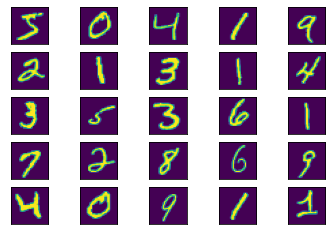

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])

Формируем модель НС

In [ ]:
model=keras.Sequential([Flatten(input_shape=(28,28,1)),
                        Dense(128,activation='relu'),
                        Dense(10,activation='softmax')])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


компилируем НС

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Обучаем НС

In [ ]:
model.fit(X_train,y_train_cat,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2841 - accuracy: 0.9196 - val_loss: 0.1550 - val_accuracy: 0.9553
Epoch 2/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1241 - accuracy: 0.9633 - val_loss: 0.1158 - val_accuracy: 0.9655
Epoch 3/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0838 - accuracy: 0.9749 - val_loss: 0.1051 - val_accuracy: 0.9689
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0618 - accuracy: 0.9814 - val_loss: 0.0928 - val_accuracy: 0.9717
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0873 - val_accuracy: 0.9753
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0374 - accuracy: 0.9887 - val_loss: 0.0938 - val_accuracy: 0.9732
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0282 - accuracy: 0.9924 - val_loss: 0.0857 - val_accuracy:

In [ ]:
model.evaluate(X_test,y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9790


[0.07855857163667679, 0.9789999723434448]

Провераяем НС

[[3.1993002e-11 7.0643580e-10 4.2250306e-07 1.3685073e-05 4.1799881e-18
  1.4467935e-10 1.3583084e-16 9.9998522e-01 4.9664948e-07 1.2570301e-07]]
Это цифра: 7


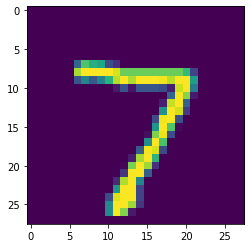

In [ ]:
n=0
X=np.expand_dims(X_test[n],axis=0)
res=model.predict(X)
print(res)
print(f'Это цифра: {np.argmax(res)}')
plt.imshow(X_test[n])

распознаем всю тестовуювыборку

In [ ]:
pred=model.predict(X_test)
pred=np.argmax(pred,axis=1)
print(pred.shape)
print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Выделим неверные значения


In [ ]:
mask=pred==y_test
print(mask[:10])

X_false=X_test[~mask]
pred_false=pred[~mask]



[ True  True  True  True  True  True  True  True  True  True]


Выведим неверные значения

Значение сети: 7


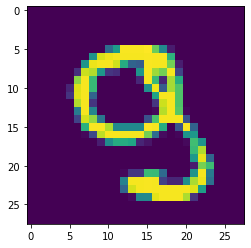

Значение сети: 2


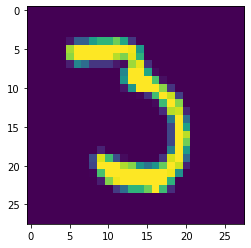

Значение сети: 1


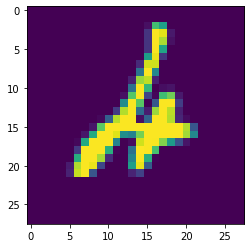

Значение сети: 0


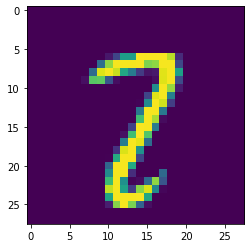

Значение сети: 4


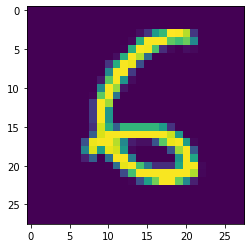

In [ ]:
for i in range(5):
  print (f"Значение сети: {str(y_test[i])}")
  plt.imshow(X_false[i])
  plt.show()